In [1]:
import numpy as np
import cv2
import random
import math
import matplotlib.pyplot as plt

### 產生salt & pepper noise圖片

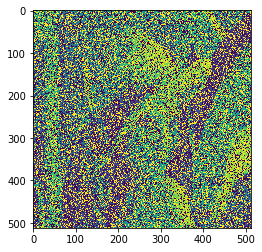

In [4]:
def sp_noise(image, prob):
    """
    Add salt and pepper noise to image
    prob: Probability of the noise
    """
    output = np.zeros(image.shape, dtype = np.uint8)
    thres = 1- prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i,j] = 0
            elif rdn > thres:
                output[i,j] = 255
            else:
                output[i,j] = image[i,j]
    return output

image = cv2.imread("Lenna_g.jpg",0)
noise_img = sp_noise(image,0.25) # 70%濃度noise
cv2.imwrite("noise_Lenna_g.jpg",noise_img)

plt.imshow(noise_img)
plt.show()   

### 讀取 Noise Image

In [2]:
img = cv2.imread("noise_Lenna_g.jpg",0)
W = int(img.shape[0])
H = int(img.shape[1])

copyimg = np.zeros((W,H), dtype=np.uint8)
print(copyimg.shape)

def MID(img, center_x, center_y, grid):
    pixel_list= []
    offset = grid//2
    
    for i in range(center_x-offset, center_x+offset+1):
        for j in range(center_y-offset,center_y+offset+1):
            pixel_list.append(img[i][j])
    pixel_list = np.sort(pixel_list)

    return pixel_list[0], pixel_list[(grid*grid)//2], pixel_list[-1]

grid = 3
maxgrid = 9

for i in range(0,511):
    for j in range(0,511):
        alt_pixel= 0
        midp= 0
        minp= 0
        maxp= 0
        minp,midp,maxp = MID(img,i,j,grid)
        
        alt_pixel = img[i][j]
        
        if minp<midp and midp<maxp:
            if minp<alt_pixel and  alt_pixel<maxp:
                copyimg[i][j] = alt_pixel
            else:
                copyimg[i][j] = midp
                break
        
        else:
            grid = grid+2
            if (grid > maxgrid):
                copyimg[i][j] = midp
                break
                
cv2.imwrite("clean_Noise.jpg", copyimg)
print(copying.shape)
plt.imshow(copyimg)
plt.show()

(512, 512)


IndexError: index 512 is out of bounds for axis 0 with size 512

In [10]:
for i in range(0,511):
    for j in range(0,511):
        w_size = [3,5,7]
        alt_pixel= 0
        midp= 0
        minp= 0
        maxp= 0
        for grid in w_size:
            minp,midp,maxp = MID(img,i,j,grid)
        
            
        
            if minp<midp and midp<maxp:
                alt_pixel = midp
                break
            alt_pixel = img[i][j]
            if minp<alt_pixel and  alt_pixel<maxp:
                copyimg[i][j] = alt_pixel
            else:
                copyimg[i][j] = midp
                break
        
        

In [25]:
img = cv2.imread("noise_Lenna_g.jpg",0)
print(img[511][511])

109
